<a href="https://colab.research.google.com/github/Amey-Thakur/R/blob/main/day_4_graphing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.r-project.org/Rlogo.png)

____________________________________________________________________________________
This tutorial is the fourth part of a series. You can start with the [Day 1](https://www.kaggle.com/code/ameythakur20/day-1-getting-started-in-r) of the tutorial.

In this part of the tutorial, we'll:
* learn how to graph our data
* save our graphs

____________________________________________________________________________________


### Learning goals:

By the end of this tutorial, you will be able to do the following things. (Don't worry if you don't know what all these things are yet; we'll get there together!)

* [Be familiar with basic concepts: functions, variables, data types and vectors](https://www.kaggle.com/code/ameythakur20/day-1-getting-started-in-r)
* [Load data into R](https://www.kaggle.com/ameythakur20/day-2-load-data-into-r)
* [Summerize your data](https://www.kaggle.com/ameythakur20/day-3-summarize-data)
* [Graph data and save your graphs](https://www.kaggle.com/ameythakur20/day-4-graphing-data)

______

### Your turn!

Throughout this tutorial, you'll have lots of opportunities to practice what you've just learned. Look for the phrase "your turn!" to find these exercises.

> **This notebook is interactive! It will have errors until you fork it and add all the code it needs to run correctly. Don't worry: if you've been working through this tutorial you already know everything you need to get it working correctly and I'll give you instructions and reminders to help you out.**

## Review: Load in and clean our data

You might remember from [the last part of this tutorial](https://www.kaggle.com/ameythakur20/day-3-summarize-data) that when you start a new notebook or R session R forgets everything you told it before. So, before we can get started on graphing our data we're going to have to :

* Tell R what libraries we're going to use
* Load our data in
* Clean our data again

In the cell below, follow the directions in the comments (lines beginning with the hashtag or pound symbol (#)) to get our data good to go. Try to test yourself by doing it without looking back at the last lesson first, although if you can't remember a step you can of course take a peek back at the last part to remind yourself.

> Hint: Make sure you're assigning your data_frame to the variable name "chocolateData" at each step. This overwrites what was previously in the data_frame with your corrected version. You'll be able to tell that you've forgotten to do this because the whole data_frame will print out in your output!

I've done some of the steps that we didn't talk about in a lot of detail for you, but if you try to run the cell without filling the rest of it in first, you're going to get an error message!

In [ ]:
# Your turn!

# tell R that we're going to use the tidyverse library

library(tidyverse)

# read in our dataset as a data_frame and save it as a variable named "chocolateData"

chocolateData <- read_csv("../input/chocolate-bar-ratings/flavors_of_cacao.csv")

# remove the first line of our dataset using a negative index

head(chocolateData)   

chocolateData <- chocolateData[-1,] 

head(chocolateData)   

# remove the white spaces in the column names
names(chocolateData) <- gsub("[[:space:]+]", "_", names(chocolateData))

# remove percentage signs in the Cocoa_Percent 
chocolateData$Cocoa_Percent <- sapply(chocolateData$Cocoa_Percent, function(x) gsub("%", "", x))

# automatically try to guess the data type of each column using type_convert

chocolateData <- type_convert(chocolateData)
                                      
# check the first few lines of our data_frame to make sure everything looks alright.
# Do you remember which function we've been using to do this?

head(chocolateData)                                      

Rows: 1795 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Company 
(Maker-if known), Specific Bean Origin
or Bar Name, Cocoa
...
dbl (3): REF, Review
Date, Rating


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba



── Column specification ────────────────────────────────────────────────────────
cols(
  `Company _(Maker-if_known)` = col_character(),
  Specific_Bean_Origin_or_Bar_Name = col_character(),
  Cocoa_Percent = col_double(),
  Company_Location = col_character(),
  Bean_Type = col_character(),
  Broad_Bean_Origin = col_character()
)




Company _(Maker-if_known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
A. Morin,Akata,1680,2015,70,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,70,France,3.50,,Cuba


## Graph our data with ggplot2

Alright, now we've got our data and it's ready and clean! Time to make some graphs. To do this, we're going to use a library called "ggplot2", which is part of the tidyverse collection of packages. (Which means, since we've already imported the "tidyverse" library, we don't have to do anything else to start using it.)

> The "gg" in "ggplot" stands for "the grammar of graphics". If you're curious, you can learn more about what this means in [this paper](http://vita.had.co.nz/papers/layered-grammar.html).

Plots in ggplot2 are "built up" using multiple functions connected with the plus sign (+). The first function, ggplot(), just draws the outline of the plot, including the the axes and tick marks. It takes two arguments.
1. The dataset that you want to plot. 
2. A function, aes(), short for aesthetic. This function itself takes multiple arguments. Let's start by using x & y, which will tell the function which columns of the data_frame to plot on the x axis and y axis.

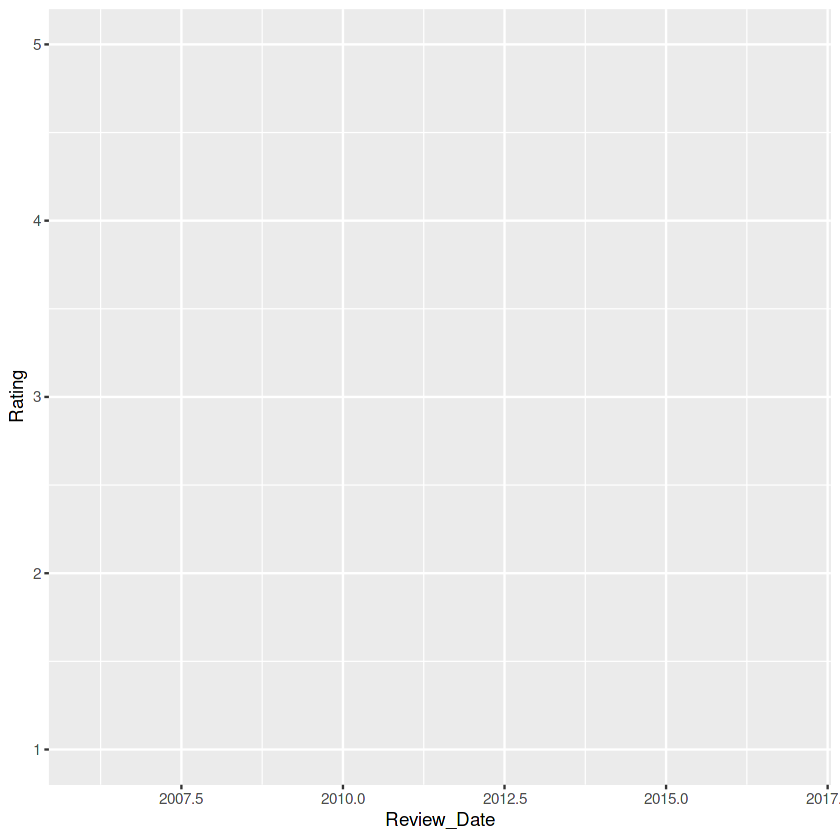

In [ ]:
# draw a blank plot with "Review_Date" as the x axis and "Rating" as the y axis.
ggplot(chocolateData, aes(x= Review_Date, y = Rating))

As you can see, the ggplot() function doesn't actually plot anything. To do this, we need to add a geom layer to our plot. There are lots of different geom layers (you can see a full list of them [here](http://ggplot2.tidyverse.org/reference/#section-layer-geoms)) and you can add multiple layers to the same plot.

> **Hint**: Different geoms require different aesthetics. If your code runs but doesn't return a plot, it's usually because you've given ggplot() one set of aesthetics, but the geom you're using need a different set. geom_histogram(), for example, only needs to  know what to plot on the x axis. If you tell it to plot something on the x axis and something else on the y axis, it won't return the plot you're expecting.

For now, let's start by adding points to our plot, one for each data point. You may know this as a "scatter plot".

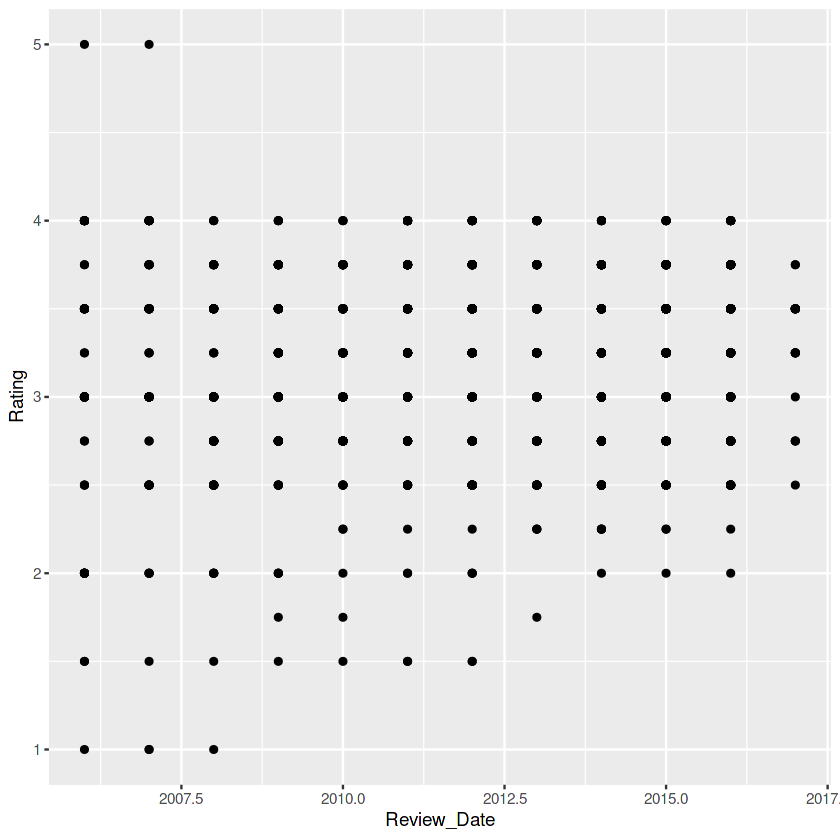

In [ ]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, and add a point for each data point
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + geom_point()

So our plot rendered correctly, but it looks like we're running into a problem: a lot of our data points are being plotted on top of each other. This makes our plot very difficult to read. There is an easy way to fix this, however: we can move each point just a little bit so we can actually see how many of them there are. We can do this using the geom "jitter", which we add by adding the layer geom_jitter().

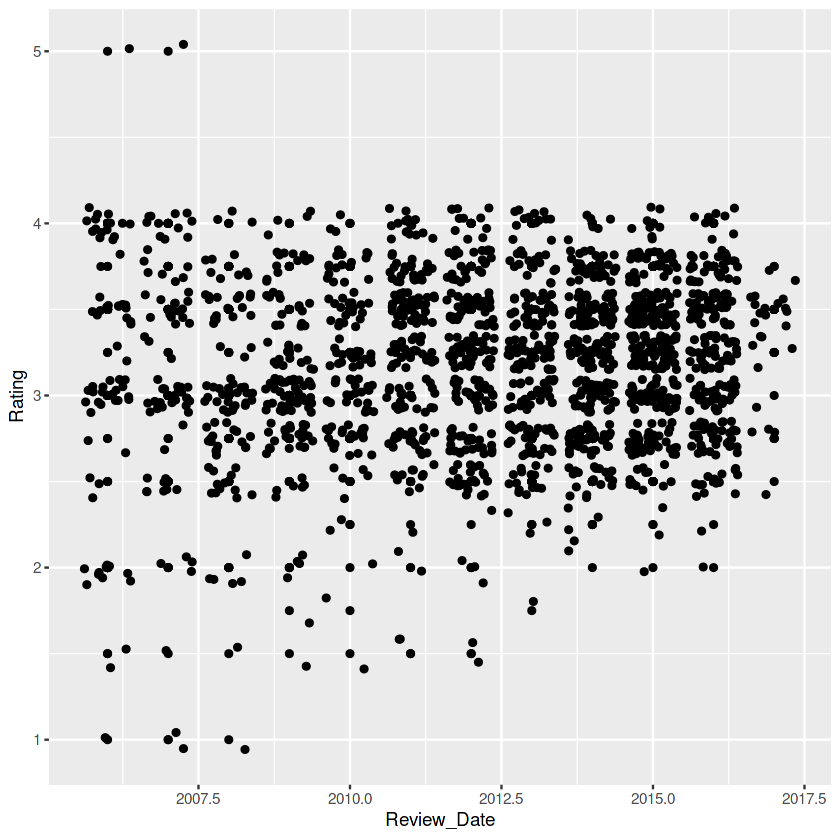

In [ ]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point & move each point slightly so they don't overlap
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + geom_point() + geom_jitter()

There we go, that plot is much easier to read! We can see that there seem to be more reviews each year, and that they seem to be getting more tightly clustered. 

What about our question from the last part of the tutorial: are reviews getting more positive over time? One way to check this is to fit a linear model to this data and see if it goes up or down over time. Using ggplot2, this is very easy to do! We can add a layer that will fit a linear model to this dataset and then plot it. Like so: 

`geom_smooth()` using formula 'y ~ x'



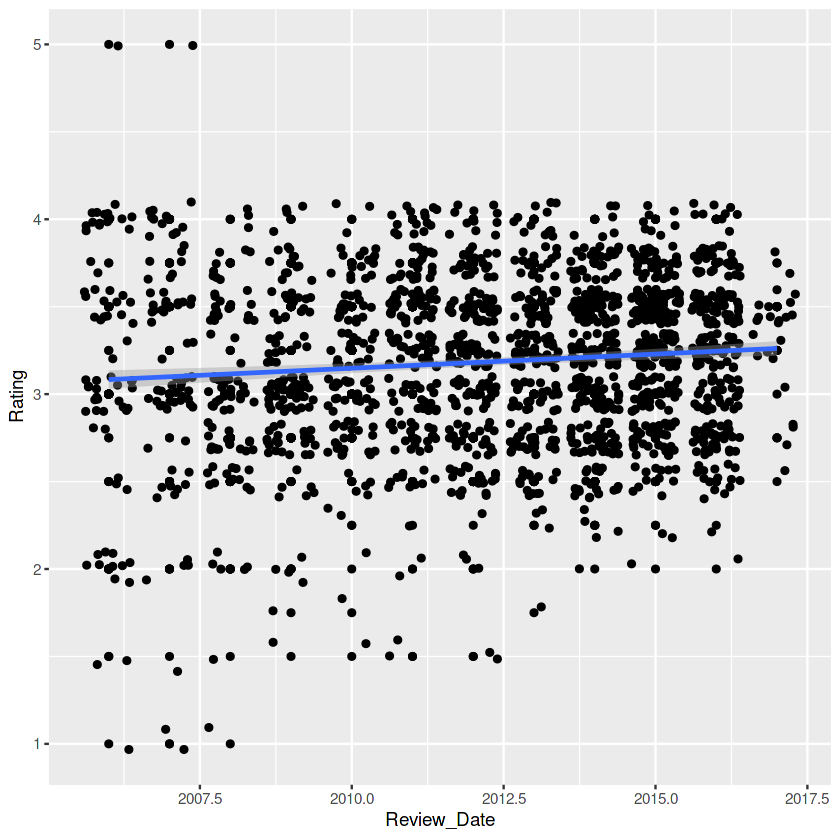

In [ ]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point, move each point slightly so they don't overlap and add a smoothed line (lm = linear model)
ggplot(chocolateData, aes(x= Review_Date, y = Rating)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

You can keep adding additional information to plots very easily by adding additional layers and aesthetic mappings. For instance, we might want to see how the cocoa percentage of chocolate bars change over time and how that affects ratings. We can do this by adding another argument to the aes() function, and telling it to plot the column Cocoa_Percent to color.

`geom_smooth()` using formula 'y ~ x'



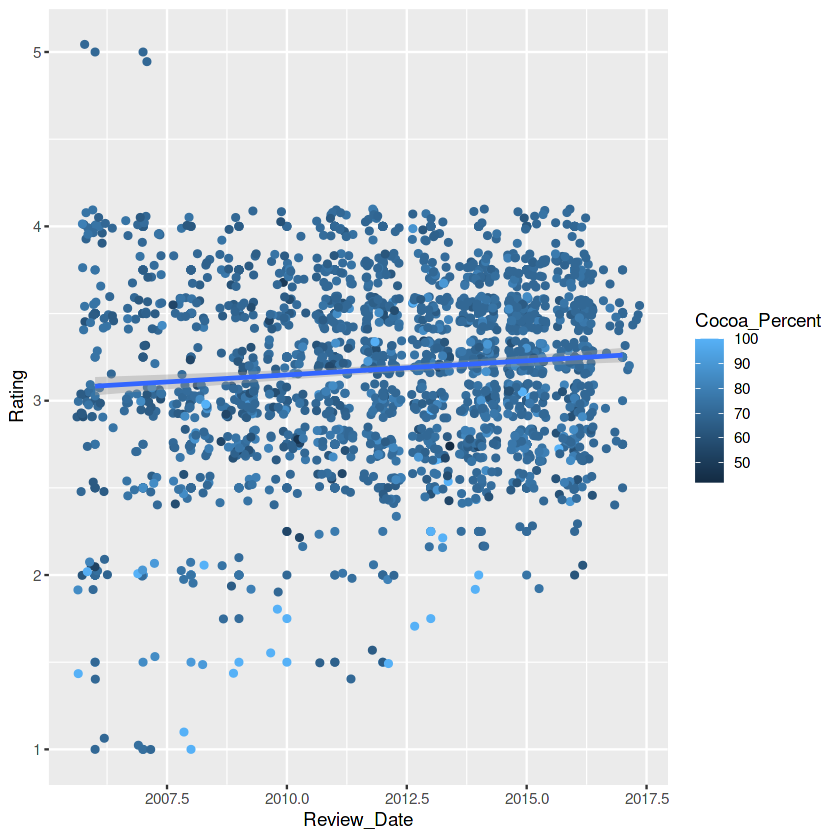

In [ ]:
# draw a plot with "Review_Date" as the x axis and "Rating" as the y axis, add a point for each data point, move each point slightly so they don't overlap and add a smoothed line (lm = linear model). Encode Cocoa_Percent as color.
ggplot(chocolateData, aes(x= Review_Date, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

It looks like chocolate bars with very high cocoa percents tend to get lower ratings. Let's see if that's the case by drawing a helpful graph. At this point, you know enough to make this graph yourself. Show me what you got! :)

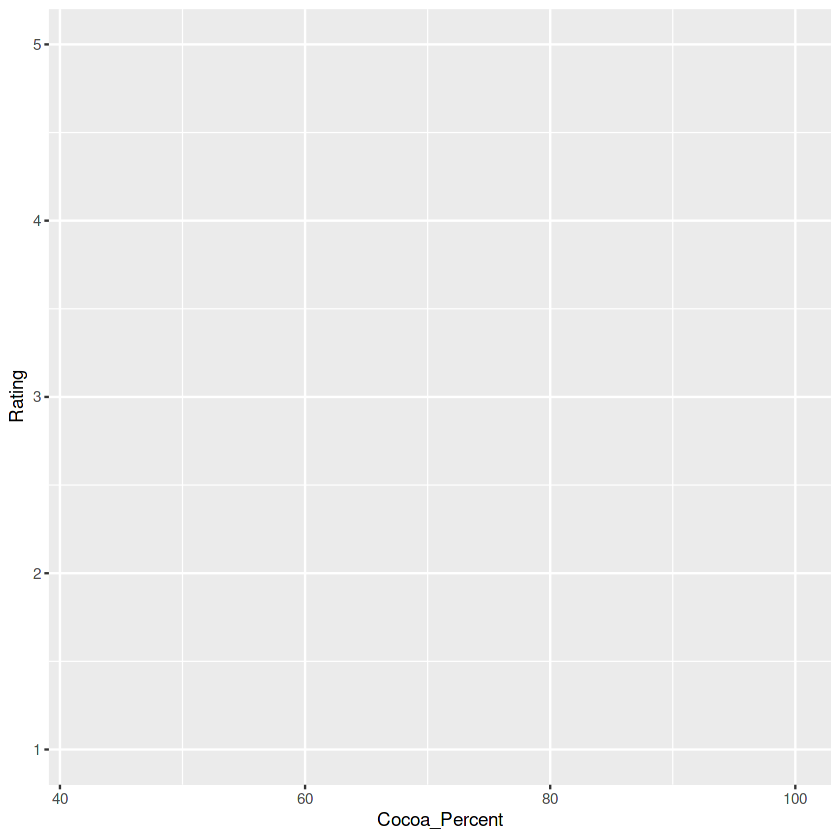

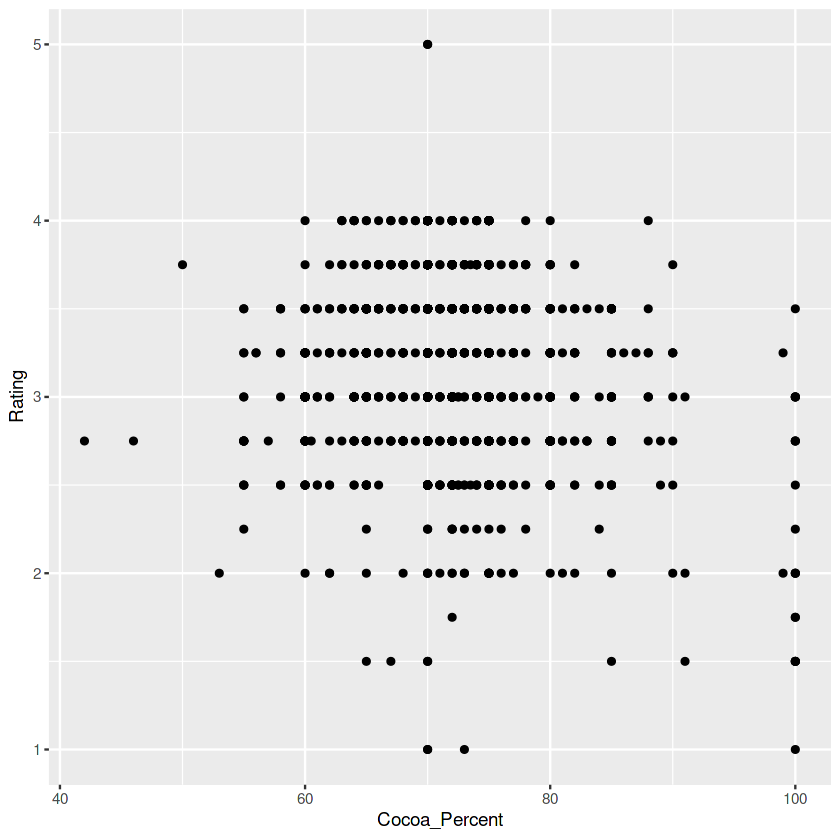

`geom_smooth()` using formula 'y ~ x'



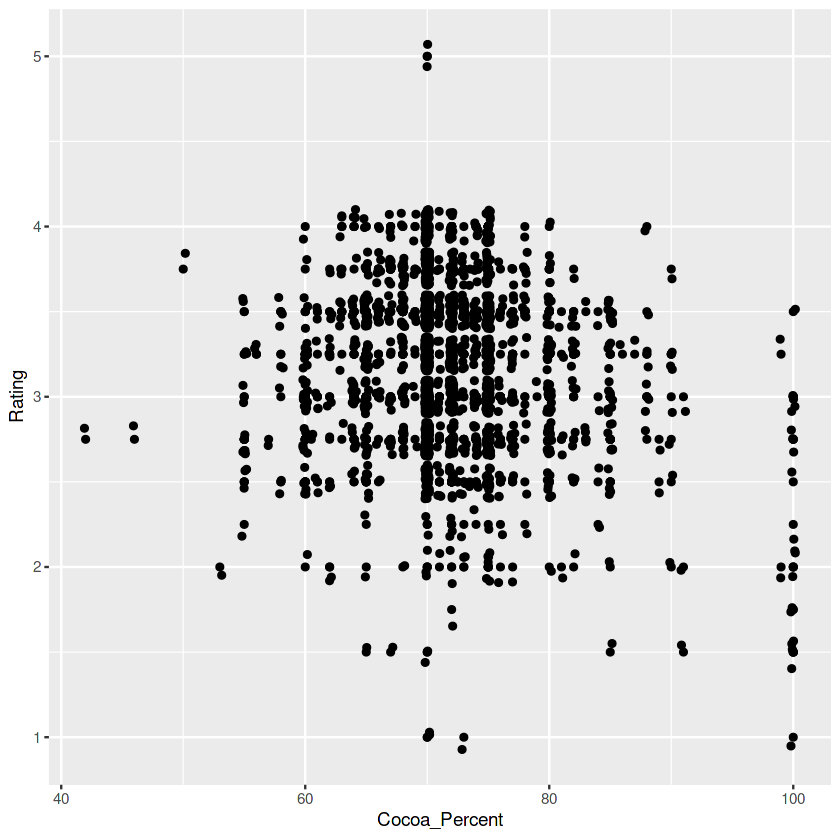

`geom_smooth()` using formula 'y ~ x'



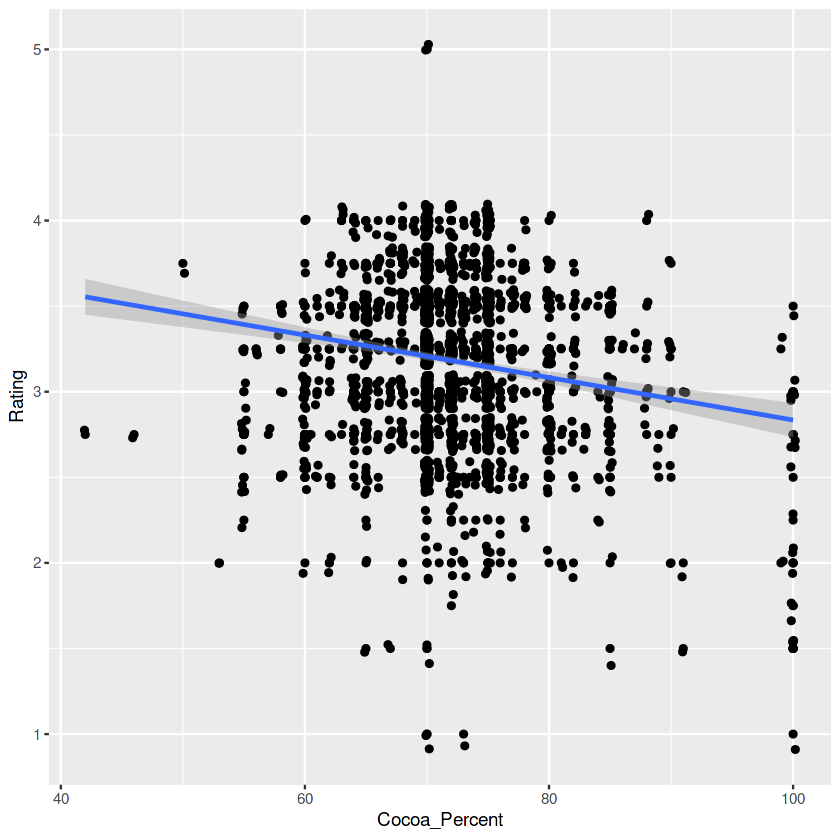

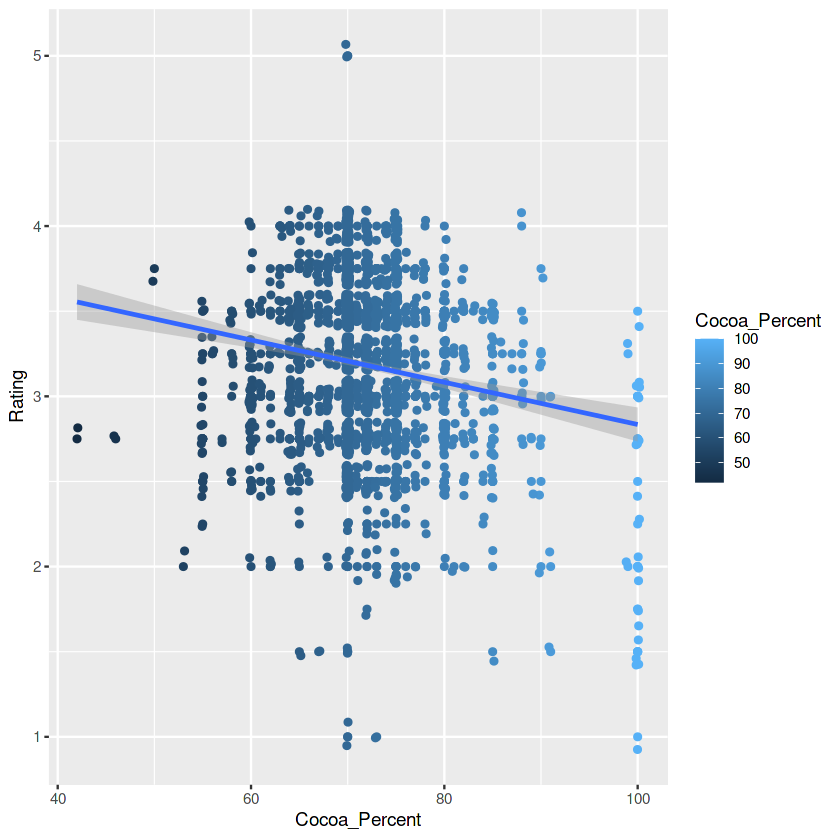

In [ ]:
# Your turn!

# Plot the relationship between cocoa percentage and ratings, using whichever geom (or multiple geoms) you like.

# Note that, if you use geom_smooth(), a linear model may not be the best fit for the data!

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating))

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating)) + geom_point()

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating)) + geom_point() + geom_jitter()

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

## Save our graphs

Excellent, we've got some pretty graphs and we want to show them off! But... how do we do that? We actually have a couple of options. 

One way is to **share the whole notebook**. To do this, you need to do two things. The first is to set the notebook to "public" using the dropdown menu at the top of the screen. (All Kaggle notebooks are private by default.)

![](https://image.ibb.co/jq36e5/Screenshot_from_2017_08_30_12_14_36.png) 

The second is to hit the blue publish button. This will run all the code chunks in a notebook and then make a static version available.

> Protip: When you publish a notebook it will run all the code chunks in a new session. This means that if, for example, you've imported a library in your current session and then deleted the library() call you'll get errors in your published notebook when you try to use functions from that library. You can check your notebook before you hit publish by closing and opening it again and running each code chunk in order.

Another way to is **save individual files**. This is useful if you want to share just a single figure or datafile without all the code you use to make it. We can save the output of ggplot() using the handy ggsave() function, like this:


In [ ]:
# save our plot to a variable with an informative name
chocolateRatingByReviewDate <- ggplot(chocolateData, aes(x= Review_Date, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

# save our plot
ggsave("chocolateRatingByReviewDate.png", # the name of the file where it will be save
       plot = chocolateRatingByReviewDate, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

# notice that this cell doesn't have any output in place! That's because in the first section we're 
# giving the plot a name rather than printing it, and in the second we're saving our plot rather 
# than printing it. We've never actually said to print our plot at any point.

`geom_smooth()` using formula 'y ~ x'




Once you've run this code chunk, your files are saved as a kernel's output. You can get the output from the output tab at the top of the notebook, which shows up between the "Data" and "Comment" tabs on notebooks that have output. 

![](https://image.ibb.co/mHG3Rk/Screenshot_from_2017_08_30_12_44_51.png)


In [ ]:
# Your turn!

# Save the plot you made showing the relationship between cocoa percentage and to this kernel's output. 

chocolateRatingByReviewDate <- ggplot(chocolateData, aes(x= Cocoa_Percent, y = Rating, color = Cocoa_Percent)) + 
    geom_point() + 
    geom_jitter() +
    geom_smooth(method = 'lm')

ggsave("chocolateRatingByCocoa_Percent.png", # the name of the file where it will be save
       plot = chocolateRatingByCocoa_Percent, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

ERROR: Error in plot_theme(plot): object 'chocolateRatingByCocoa_Percent' not found


And that's it for this tutorial! You've got all the tools you need to start analyzing and plotting data on your own. I'm so excited for you to start your R journey. 

## Putting it together: Summary graphs

In the last part of this tutorial we learned about pipes (%>%) and how we could use them to group and summarize data, like this:

In [ ]:
# Return the average and sd of ratings by the year a rating was given
chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageRating = mean(Rating),
             sdRating = sd(Rating))

We can then plot these summarized datasets, which may give us a better idea of trends than plotting the entire dataset.

In [ ]:
# Return the average and sd of ratings by the year a rating was given
averageRatingByYear <- chocolateData %>%
    group_by(Review_Date) %>%
    summarise(averageRating = mean(Rating))

# plot only the average rating by year
ggplot(averageRatingByYear, aes(y= averageRating, x = Review_Date )) + 
    geom_point() + # plot individual points
    geom_line() # plot line

In [ ]:
# Your turn!

# Make & save a data_frame with the average and sd Cocoa_Percent by the year the reviews were written

chocolateData %>%
    group_by(Cocoa_Percent) %>%
    summarise(averageRating = mean(Rating),
             sdRating = sd(Rating))

# Plot the data_frame you've made using your choice of geom(s)

averageRatingByYear <- chocolateData %>%
    group_by(Cocoa_Percent) %>%
    summarise(averageRating = mean(Rating))

ggplot(averageRatingByYear, aes(y= averageRating, x = Cocoa_Percent )) + 
    geom_point() + # plot individual points
    geom_line() # plot line

# Save your plot to the output

ggsave("averageRatingByYear.png", # the name of the file where it will be save
       plot = averageRatingByYear, # what plot to save
       height=6, width=10, units="in") # the size of the plot & units of the size

# Extra credit: Add a title to your plot. You may find the function ggtitle() helpful

ggtitle("Average Rating By Year")

## Next step: [Find an interesting dataset and start a new analysis!](https://www.kaggle.com/datasets?sortBy=updated&group=featured)

--------------------------------------------------------------
## Some parting thoughts: 

As you get more comfortable with R, you're probably going to want to explore this programming language more. Below, I've collected some resources you might find helpful, and some handy tips that I've found valuable. Good luck and have fun!

--------------------------------------------------------------

### A few resources:

* The tidyverse documentation can be found here: http://www.tidyverse.org/
* I've found these books to be very helpful and clearly written. (And also very free, which doesn't hurt!). They've by Hadley Wickham, who designed and wrote many of the tidyverse packages, including ggplot:
  * [R for Data Science](http://r4ds.had.co.nz/)
  * [Ggplot2: Elegant Graphics for Data Analysis](http://ggplot2.org/book/)
  * [Advanced R](http://adv-r.had.co.nz/)
* If you're interested in text analysis or Natural Language Processing, I would recommend the excellent tidytext package. The book is available for free [here](http://tidytextmining.com/).
* If you'd like to work with R locally on your personal computer, I would recommend using the [RStudio](https://www.rstudio.com/) integrated development environment. You can work with R in your command line/console, but RStudio is like a word-processor program for code. It has a lot of nice features that make it nicer and simpler to write R code.
* The R community is very active and welcoming. [This blog post](http://www.burns-stat.com/r-and-social-media/) has a good overview of places you can look to find help (and new friends!). 

--------------------------------------------------------------

### Some handy tips:

1.  If you get an error message you can't figure out, **copy the text of the error and Google it** to see if anyone else has had the same problem. 99 times out of 100 you'll find that someone else has already come up with a solution!
2.  **Double-check your capitalization**. I find that a good 20% of my errors are because I've mis-capitalized something.
3.  **Read the documentation**! Remember that you can quickly pull up the documentation for a certain function by putting a question mark in front of the function name and then running the command. 
4. If you're not sure how to start approaching a problem, **start by writing out all the steps you want your code to do in English** (or your language of choice). Then turn each step into a separate comment in your code and write the code to do that step underneath it. Not only will it help you organize your thoughts, but your code will also be nicely commented when you're done.
5. Remember that you put the arguments for a function in parentheses (), and you get data from inside an object using square brackets []. **someText() is a function, someText[] is an object**: if you try to pass arguments to an object you'll get an error.
6. If you're not sure why a data_frame isn't acting the way you expect it to, **str() is a good place to start figuring out what an object is behaving in a surprising way**. You'd be surprised how often I've found out that what I thought was a data_frame ended up being something else entirely!
7. **Remember not to put special characters in names**. In general, the only non alpha-numeric character you want to use in a name is a period (.) or underscore (\_) between words to make it easier to read. You can find a handy style-guide [here](http://adv-r.had.co.nz/Style.html). (You don't have to follow a style-guide, but it makes it easier for other people to read your code.)
8. **You can keep certain lines of code from running but putting a hashtag/pound sign (#) in front of them** to turn them into comments. This is called "commenting out" code, and it can be really helpful if you're trying to figure out which lines are generating which errors.
9. Once you start typing a part of R code, like the name of a variable or a function, **you can complete words in your code automatically by pressing the TAB key**. If there's more than one valid completion, a list of possible completions will drop down. This is really handy when you want to see all your geom options, for example.
10.  **Read other people's R code**. I've learned a lot of handy tips over the years from seeing how other people do things. On Kaggle, you can find R code by going to [the kernels page](https://www.kaggle.com/kernels) and filtering for kernels written in R.  

![](https://image.ibb.co/cRsYcQ/Screenshot_from_2017_08_30_13_49_23.png)